In [1]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

n_classes = 100
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 100)
Epoch 1/10
98/98 [==============================] - 76s 768ms/step - loss: 200.0857 - accuracy: 0.0214 - val_loss: 4.5317 - val_accuracy: 0.0383
Epoch 2/10
98/98 [==============================] - 74s 758ms/step - loss: 4.2616 - accuracy: 0.0813 - val_loss: 4.1124 - val_accuracy: 0.1045
Epoch 3/10
98/98 [==============================] - 74s 760ms/step - loss: 3.5709 - accuracy: 0.1817 - val_loss: 3.9260 - val_accuracy: 0.1329
Epoch 4/10
98/98 [==============================] - 81s 831ms/step - loss: 2.8833 - accuracy: 0.3059 - val_loss: 3.9600 - val_accuracy: 0.1443
Epoch 5/10
98/98 [==============================] - 81s 827ms/step - loss: 2.2030 - accuracy: 0.4507 - val_loss: 4.2329 - val_accuracy: 0.1460
Epoch 6/10
98/98 [==============================] - 83s 845ms/step - loss: 1.5765 - accuracy: 0.6013 - val_loss: 4.6872 - val_accuracy: 0.1451
Epoch 7/10
98/98 [==============================] - 8

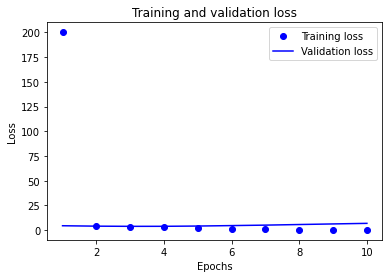

In [3]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

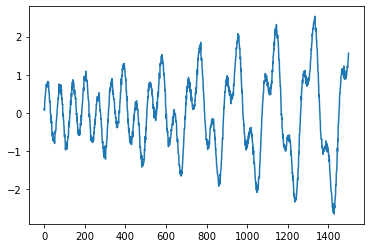

In [5]:
time_series_length = 1500
t = np.linspace(0, 50, time_series_length)
ts = t * np.cos(t) / 2 + 9 * np.sin(t*3) + 0.8 * np.random.standard_normal(size=time_series_length)
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(ts_norm)

In [6]:
train_size = int(len(ts) * 0.75)
test_size = len(ts) - train_size
train, test = ts_norm[0:train_size], ts_norm[train_size:len(ts)]

def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps)]
        x.append(a)
        y.append(dataset[i+time_steps])
    return np.array(x), np.array(y)

In [7]:
n_time_steps = 10

x_train, y_train = create_dataset(train, n_time_steps)
x_test, y_test = create_dataset(test, n_time_steps)
n_inputs = 1

x_train = np.reshape(x_train, (x_train.shape[0], n_time_steps, n_inputs))
x_test = np.reshape(x_test, (x_test.shape[0], n_time_steps, n_inputs))

model =  keras.Sequential()
model.add(layers.LSTM(100, input_shape=(n_time_steps, n_inputs), return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
35/35 - 4s - loss: 0.1686 - 4s/epoch - 112ms/step
Epoch 2/5
35/35 - 0s - loss: 0.0603 - 333ms/epoch - 10ms/step
Epoch 3/5
35/35 - 0s - loss: 0.0271 - 317ms/epoch - 9ms/step
Epoch 4/5
35/35 - 0s - loss: 0.0116 - 323ms/epoch - 9ms/step
Epoch 5/5
35/35 - 0s - loss: 0.0098 - 339ms/epoch - 10ms/step


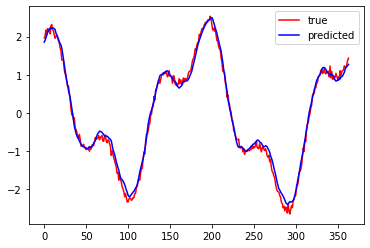

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

y_pred = model.predict(x_test)
plt.plot(y_test, 'r', label = 'true')
plt.plot(y_pred, 'b', label = 'predicted')
plt.legend()

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [44]:
dfhouse = pd.read_csv("D:\Labs\ParisHousingClass.csv",sep=",")
dfhouse.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [45]:
label = LabelEncoder()
dfhouse['category'] = label.fit_transform(dfhouse['category'])
continiousColumns = ["squareMeters", "numberOfRooms", "hasYard", "hasPool", "floors", "cityCode","cityPartRange", "numPrevOwners", "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom", "price", "category"]
willScale  = continiousColumns
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(dfhouse[willScale]))

In [46]:
x = scaledColums
y = pd.DataFrame(dfhouse['category'],columns=['category'])

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)

yTrain = pd.get_dummies(data=yTrain,columns =['category'])
yTest = pd.get_dummies(data=yTest,columns =['category'])

model_nn = keras.Sequential([keras.layers.Dense(18,kernel_initializer = 'he_uniform',input_shape=(18,),activation = 'relu'),
                            keras.layers.Dense(30,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(22,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(2,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'),
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)

model_nn.compile(loss = "binary_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 10,callbacks = es)

Epoch 1/10
210/210 [==============================] - 2s 5ms/step - loss: 0.2057 - accuracy: 0.9255 - val_loss: 0.0225 - val_accuracy: 0.9991
Epoch 2/10
210/210 [==============================] - 1s 4ms/step - loss: 0.0054 - accuracy: 0.9999 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
210/210 [==============================] - 1s 4ms/step - loss: 7.1109e-04 - accuracy: 1.0000 - val_loss: 4.7719e-04 - val_accuracy: 1.0000
Epoch 4/10
210/210 [==============================] - 1s 4ms/step - loss: 2.7325e-04 - accuracy: 1.0000 - val_loss: 2.2758e-04 - val_accuracy: 1.0000
Epoch 5/10
210/210 [==============================] - 1s 4ms/step - loss: 1.4075e-04 - accuracy: 1.0000 - val_loss: 1.3129e-04 - val_accuracy: 1.0000
Epoch 6/10
210/210 [==============================] - 1s 4ms/step - loss: 8.4228e-05 - accuracy: 1.0000 - val_loss: 8.2644e-05 - val_accuracy: 1.0000
Epoch 7/10
210/210 [==============================] - 1s 5ms/step - loss: 5.5575e-05 - accuracy: 1.0000 - val_loss: 

In [48]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)
print("test_accuracy:",test_acc)

104/104 [==============================] - 0s 3ms/step - loss: 2.1702e-05 - accuracy: 1.0000
test_accuracy: 1.0


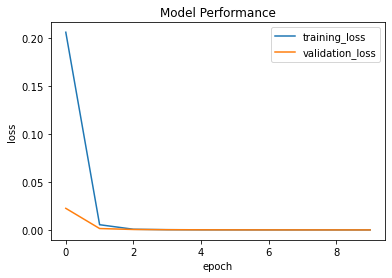

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()